# Lesson #02 - The beta-binomial model

This notebook explores the **beta-binomial model**. It is strongly based on Ref. *Machine Learning : A Probabilistic Perspective*, by Kevin P. Murphy, 2012, ISBN 978-0-262-01802-9, pp. 72-78.

It was written by Bruno Abreu: https://sites.google.com/view/brunoabreu/home

Last time this notebook was updated was on: 08-04-2020.

Please, feel free to explore it. The author appreciates being credited.

## Introduction

In the last lesson, we have constructed a framework to infer a distribution over a discrete variable that is drawn from an instance of a finite hypothesis space, $h \in H$, given a series of discrete observations $D$.

Here, we will analyze a similar situation, where now the unknown parameters are continuous, so the hypothesis space is some subset of $\mathbb{R}^K$, where $K$ is the number of parameters.

For that, consider the problem of inferring the probability that a coin shows up heads, given a series of observed coin tosses. Although this might look simple, it was the example analyzed by Bayes in his original paper of 1763.
We will proceed exactly like before: specify priors and likelihood, and then deriving posterior and posterior predictive distributions.

## Likelihood

Suppose that $X_i \sim Ber(\theta)$, where $Ber(p)$ is the Bernoulli distribution, the discrete probability distribution of a random variable that takes the value 1 with probability $p$ and the value 0 with probability $q = 1- p$. It can be thought of as a model for the set of possible outcomes of any single experiment that asks a yes-no question. 

In our coin-toss example, $X_i = 1$ represents “heads”, $X_i = 0$ represents “tails”, and $\theta \in [0,1]$ is the rate parameter (probability of heads). In case the data is **independently and identically distributed** (iid), the likelihood has the form

$p(D|\theta) = \theta^{N_1} (1 – \theta)^{N_0},$

where we have $N_1 = \sum_{i=1}^N \mathbb{I}(x_i=1)$ heads and $N_0 =\sum_{i=1}^N \mathbb{I}(x_i=0)$ tails. These two counts are called **sufficient statistics** of the data because they are all we need to know about $D$ to infer $\theta$.

Now suppose that the data consists of the count of the number of heads $N_1$ observed in a fixed number $N = N_1 + N_0$ of trials. In this case, we would have $N_1 \sim Bin(N,\theta)$, where $Bin$ is the binomial distribution,

$Bin(k | n,\theta) = {n\choose k}\theta^k(1-\theta)^{n-k}.$

Since $n\choose k$ is a constant that does not depend on $\theta$, the likelihood for the binomial sampling model is the same as the likelihood for the Bernoulli model. Therefore, any infereces that we make about $\theta$ will be the same whether we observe the counts, $D = (N_1, N)$, or a sequence of trials, $D = \{x_1, …, x_N\}$.

## Prior

We need a prior that has support over the interval $[0,1]$. Notice that a convenient one would be

$p(\theta) \propto \theta^{\gamma_1} (1-\theta)^{\gamma_2}$,

for some prior parameters $\gamma_1$ and $\gamma_2$, simply because the posterior would be easily written as

$p(\theta|D) \propto p(D|\theta)p(\theta) = \theta^{N_1+\gamma_1}(1-\theta)^{N_0+\gamma_2}$.

When prior and posterior have the same form, the prior is called a **conjugate prior** for the corresponding likelihood. They usually simplify computation.

In the case of the Bernoulli distribution, the conjugate prior is the beta distribution:

$ Beta(\theta | a,b) \propto \theta^{a-1}(1-\theta)^{b-1}$.

This distribution can be used to model events that are constrained to take place within an interval defined by a minimum and a maximum value, such as to describe the time to completion and the cost of a task in project management. In a more general context, it is used to model the behavior of random variables limited to intervals of finite length. 

The two parameters here are called **hyper-parameters**, and they can be set in order to encode our prior beliefs, like we did before. For instance, to encode our beliefs that $\theta$ has mean 0.7 and standard deviation 0.2, we would set $a = 2.975$ and $b = 1.275$. If we know nothing about $\theta$, except that it is in the interval $[0,1]$, we can use a uniform prior, with $a = b = 1$.

## Posterior

If we multiply the likelihood by the beta prior, we get

$p(\theta |D) \propto Bin(N_1|\theta, N_0+N_1) Beta(\theta|a,b) \propto Beta(\theta|N_1+a, N_0+b)$,

which is just adding the prior hyper-parameters to the empirical counts. For this reason, they are also called **pseudo counts**. The strength of the prior, sometimes called the **effective sample size** of the prior, is the sum of its pseudo counts. 

Since this posterior is a well-known distribution, we can easily calculate the statistical properties of this model. For instance, check the material about the Beta distribution here: https://en.wikipedia.org/wiki/Beta_distribution

### Mean and mode
The MAP estimate will be given by

$ \hat{\theta}_{MAP} = \frac{a + N_1 - 1}{a + b + N - 2}$.

By using a uniform prior, the MAP estimate reduces to the MLE, which is, of course, just the empirical fraction of heads:

$\hat{\theta}_{MLE} = N_1 / N$.

By contrast, the posterior mean is given by

$ \bar{\theta} = \frac{a+N_1}{a+b+N} $.

It is possible to explicitly verify the notion that the posterior is some sort of compromise between what we previously believed (prior) and what the data is telling us (likelihood).

Let $\alpha_0 = a + b$ be the equivalent sample size of the prior, and the prior mean be $m_1 = a/\alpha_0$. Then, the posterior mean is

$ \mathbb{E}[\theta|D] = \frac{\alpha_0 m_1 + N}{N + alpha_0} = \frac{\alpha_0}{N + \alpha_0}m_1 + \frac{N}{N + \alpha_0}\frac{N_1}{N} = \lambda m_1 + (1-\lambda)\hat{\theta}_{MLE}$,

where $\lambda = \alpha_0 / (N+\alpha_0)$ is the ratio of the prior to posterior equivalent sample size. Therefore, the posterior mean is a convex combination of the prior mean and MLE.

### Variance
In order to know how much we can trust these estimates, we can measure the variance of the posterior. It is given by

$ var[\theta|D] = \frac{(a+N_1)(b+N_0)}{(a+N_1+b+N_0)^2(a+N_1+b+N_0+1)}, $

which can be simplified in the limite $N \gg a,b$, to

$ var[\theta|D] \approx \frac{N_1 N_0}{N^3} = \frac{\hat{\theta}(1-\hat{\theta})}{N}$,

where $\hat{\theta}$ is the MLE. Therefore, the **error bar** of the estimate is given by

$ \sigma = \sqrt{var[\theta|D]} \approx \sqrt{\frac{\hat{\theta}(1-\hat{\theta})}{N}}$. 

Notice that it goes down with $N$, and also that it is maximized when $\hat{\theta}=0.5$ and minimized when $\hat{\theta}$ is close to either 0 or 1. In other words, it is easier to be sure that a coin is biased than to be sure that it is fair.

## Posterior predictive distribution

Let's separate the predictive distribution in two cases.

### Predicting a single future trial

Since we know that the posterior is a Beta distribution, we can calculate the probability of the next coin-toss being heads as:

$p(\tilde{x} = 1 | D) = \int_0^1 p(x=1 | \theta) p(\theta | D) d\theta = \int_0^1 \theta Beta(\theta | a,b)d\theta$,

which is exactly the expected value of $\theta$,

$p(\tilde{x} = 1 | D) = \mathbb{E}[\theta | D] = \frac{a}{a+b}$.

Notice that, in this case, the posterior predictive distribution is equivalent to plugging in the posterior mean parameters $\bar{\theta}$.


### Overfitting
Suppose that, instead, we plug-in the MLE. This can perform very poorly for small samples. For instance, if we had seen $N = 3$ tails in a row, we would predict that heads are impossible! This is called the **zero count problem**, which occurs when estumating counts from small datasets. This sounds not very dangerous in the "big data" era, but once we partition a certain dataset (number of times a specific person performed a specific task), it can very well happen. Thus, Bayesian methods are still quite useful.

A simple solution comes by using a uniform prior, with $a=b=1$. In this case,

$p(\tilde{x} = 1 | D) = \frac{N_1 + 1}{N_1 + N_0 +2}$,

justifying the common practice of adding 1 to empirical counts, normalizing, and then plugging it in, which is known as **add-one smoothing**.


### Predicting multiple future trials
This can be done by predicting the number of heads, $x$, in future $M$ trials. It is given by

$ p(x | D, M) = \int_0^1 Bin(x| \theta M) Beta(\theta | a,b) d\theta = {M \choose x} \frac{1}{B(a,b)} 
\int_0^1 \theta^x (1-\theta)^{M-x} \theta^{a-1}(1-\theta)^{b-1} d \theta $,

but the integral is simply the normalization constant for $Beta(a+x, M-x+b)$, therefore

$ p(x | D, M) = {M \choose x} \frac{B(a+x, M-x+b)}{B(a,b)} \equiv Bb(x | a,b, M)$,

which is know as the **beta-binomial distribution**.

# Cooking things down to code

As you may notice, a lot of things in this lesson are actually analytical, which is different from the previous one where we had quite a bit to code. However, it is interesting to practice our ability to explore Python libraries that provide support to different probability distributions, as they lie within the heart of whatever model we come across. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import beta

In [2]:
x = np.linspace(0.0001,0.9999,1000)     # [0,1] interval

a, b = 2, 2    # parameters for the distribution Beta(a,b)             
prior = beta.pdf(x,a,b)    # Beta distribution probability density function with parameters (2,2)

n0, n1 = 17, 3   # supposed that this is the statistics we observed for heads/tails

Now recall that, for the likelihood, we have

$p(D|\theta) = \theta^{N_1} (1 – \theta)^{N_0},$

whereas the Beta distribution is

$ Beta(\theta | a,b) \propto \theta^{a-1}(1-\theta)^{b-1}$.

Therefore, we need to add 1 to each parameter:

In [3]:
likelihood = beta.pdf(x,n1+1,n0+1)

posterior = beta.pdf(x,n1+a,n0+b)

Text(0.5, 1.0, 'Prior, Likelihood and Posterior for a $N_0 = 17$, $N_1 = 3$ observation')

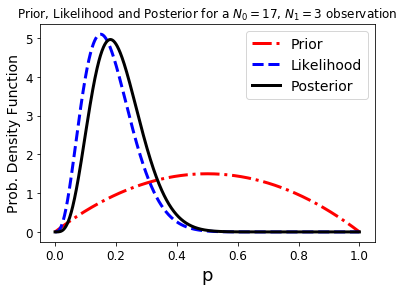

In [4]:
plt.figure()

plt.plot(x, prior, '-.', color='red', lw=3, label='Prior')
plt.plot(x, likelihood, '--', color='blue', lw=3, label='Likelihood')
plt.plot(x, posterior, '-', color='black', lw=3, label='Posterior')

plt.xlabel('p',fontsize=18)
plt.ylabel('Prob. Density Function',fontsize=14)

plt.legend(fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.title(r'Prior, Likelihood and Posterior for a $N_0 = %d$, $N_1 = %d$ observation' % (n0,n1))

Let's think of a more "fair" example:

Text(0.5, 1.0, 'Prior, Likelihood and Posterior for a $N_0 = 10$, $N_1 = 11$ observation')

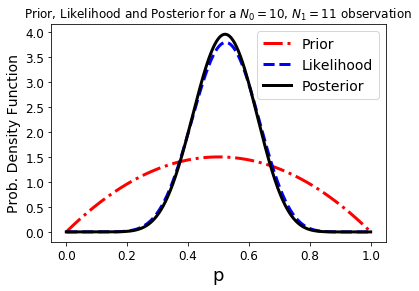

In [5]:
n0, n1 = 10, 11  
likelihood = beta.pdf(x,n1+1,n0+1)
posterior = beta.pdf(x,n1+a,n0+b)

plt.figure()

plt.plot(x, prior, '-.', color='red', lw=3, label='Prior')
plt.plot(x, likelihood, '--', color='blue', lw=3, label='Likelihood')
plt.plot(x, posterior, '-', color='black', lw=3, label='Posterior')

plt.xlabel('p',fontsize=18)
plt.ylabel('Prob. Density Function',fontsize=14)

plt.legend(fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.title(r'Prior, Likelihood and Posterior for a $N_0 = %d$, $N_1 = %d$ observation' % (n0,n1))

What if we previously suspect that the coin is not fair? We can encode that by having a skewed prior:

Text(0.5, 1.0, 'Prior, Likelihood and Posterior for a $N_0 = 10$, $N_1 = 11$ observation')

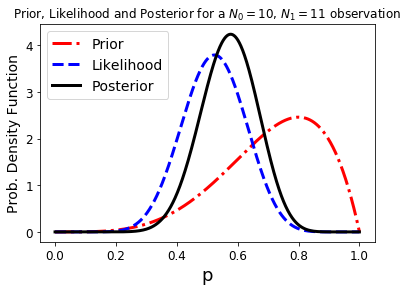

In [6]:
a, b = 5, 2
prior = beta.pdf(x,a,b)
n0, n1 = 10, 11  
likelihood = beta.pdf(x,n1+1,n0+1)
posterior = beta.pdf(x,n1+a,n0+b)


plt.figure()
plt.plot(x, prior, '-.', color='red', lw=3, label='Prior')
plt.plot(x, likelihood, '--', color='blue', lw=3, label='Likelihood')
plt.plot(x, posterior, '-', color='black', lw=3, label='Posterior')
plt.xlabel('p',fontsize=18)
plt.ylabel('Prob. Density Function',fontsize=14)
plt.legend(fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title(r'Prior, Likelihood and Posterior for a $N_0 = %d$, $N_1 = %d$ observation' % (n0,n1))

Notice that, even though the observations were quite even (look at the likelihood), the prior pushes the posterior to higher values of $p$.

## Predictions

From the theory shown in the beginning of this lesson, we see that pretty much everything for this model has a closed-form. Let's make use of it! Remember, the predictive distrbution is a beta-binomial function.

In [7]:
from scipy.stats import betabinom

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 ]),
 <a list of 7 Text yticklabel objects>)

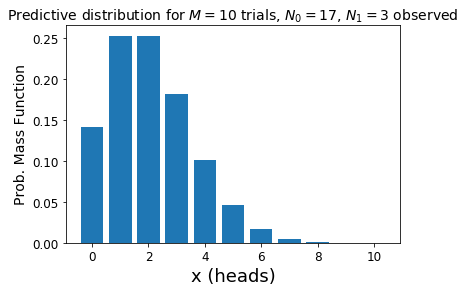

In [8]:
a, b = 2, 2
n0, n1 = 17, 3

M = 10
x = np.arange(0,11,1)

predictive = betabinom.pmf(x,M,n1+a,n0+b)

plt.bar(x,predictive)
plt.xlabel('x (heads)',fontsize=18)
plt.ylabel('Prob. Mass Function',fontsize=14)
plt.title(r'Predictive distribution for $M = %d$ trials, $N_0 = %d$, $N_1 = %d$ observed' % (M,n0,n1),fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

We could have also plugged in the MAP estimate, for innstance. In this case:

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35]),
 <a list of 8 Text yticklabel objects>)

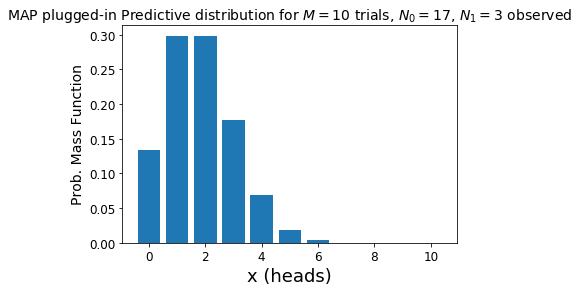

In [9]:
from scipy.stats import binom

p = (a + n1 - 1) / (a + b + n0 + n1 -2)
plugin = binom.pmf(x,M,p)

plt.bar(x,plugin)
plt.xlabel('x (heads)',fontsize=18)
plt.ylabel('Prob. Mass Function',fontsize=14)
plt.title(r'MAP plugged-in Predictive distribution for $M = %d$ trials, $N_0 = %d$, $N_1 = %d$ observed' % (M,n0,n1),fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

Clearly, the Bayesian prediction has longer tails, being therefore less prone to overfitting.

I hope you have enjoyed this lesson! It is quite interesting to play with the code and test different priors and different possibilities of observed data. In the next lesson, I will discuss the Dirichlet-multinomial model.